In [41]:
from google.colab import files
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # Importar función compatible con Colab
# Subir imagen
uploaded = files.upload()

Saving IMG_1939.JPEG to IMG_1939 (1).JPEG


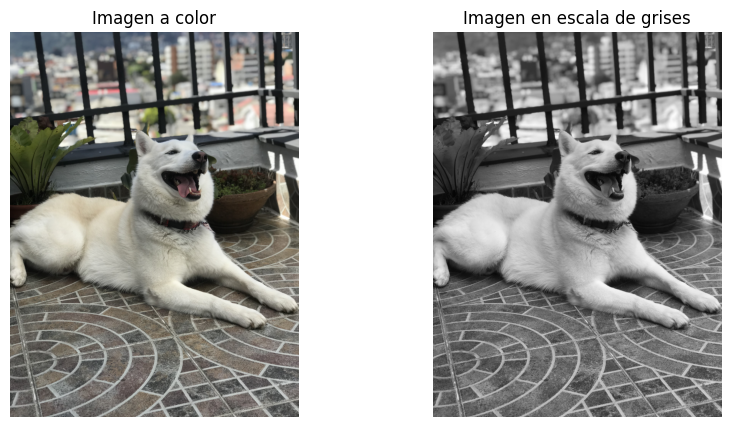

In [42]:
# Cargar imagen (suponemos que solo se subió una)
for file_name in uploaded.keys():
    # Abrir imagen a color
    img_color = Image.open(file_name)

    # Convertir a escala de grises
    img_gray = img_color.convert("L")

    # Mostrar imágenes
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.title("Imagen a color")
    plt.imshow(img_color)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.title("Imagen en escala de grises")
    plt.imshow(img_gray, cmap='gray')
    plt.axis("off")
    plt.show()

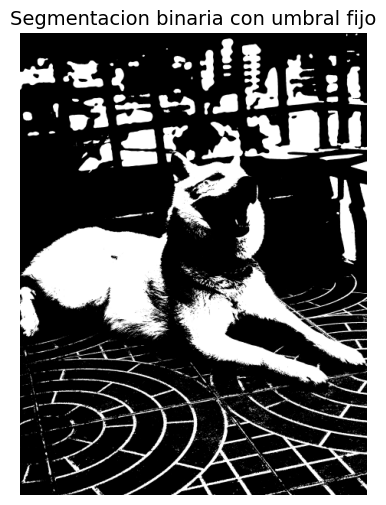

In [44]:
# Convertir a arreglo NumPy
img_np = np.array(img_gray)

# Aplicar umbral fijo
umbral = 165
_, img_binaria = cv2.threshold(img_np, umbral, 255, cv2.THRESH_BINARY)

# Redimensionar la imagen binaria
escala = 0.15
ancho = int(img_binaria.shape[1] * escala)
alto = int(img_binaria.shape[0] * escala)
dim = (ancho, alto)

img_redimensionada = cv2.resize(img_binaria, dim, interpolation=cv2.INTER_AREA)

# Mostrar la imagen redimensionada con subtítulo usando matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img_redimensionada, cmap='gray')
plt.title('Segmentacion binaria con umbral fijo', fontsize=14)
plt.axis('off')  # Ocultar ejes
plt.show()

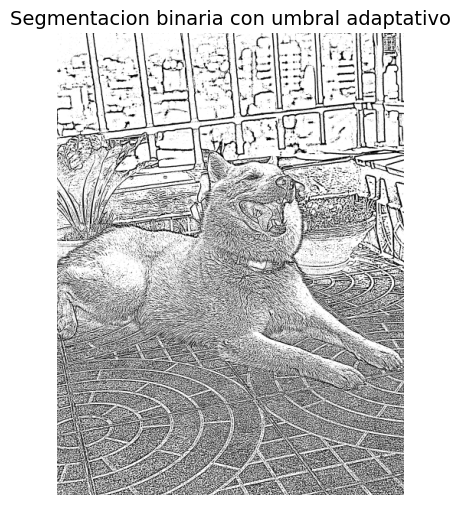

In [45]:
# Aplicar umbral adaptativo
img_adaptativa = cv2.adaptiveThreshold(
    img_np,                  # imagen en escala de grises
    255,                     # valor máximo a asignar si cumple condición
    cv2.ADAPTIVE_THRESH_MEAN_C,  # método (puedes probar también GAUSSIAN_C)
    cv2.THRESH_BINARY,       # tipo de umbralización
    15,                      # tamaño del bloque (debe ser impar)
    2                        # constante que se resta del promedio
)

# Redimensionar (opcional)
escala = 0.15
dim = (int(img_adaptativa.shape[1] * escala), int(img_adaptativa.shape[0] * escala))
img_redimensionada = cv2.resize(img_adaptativa, dim, interpolation=cv2.INTER_AREA)

# Mostrar la imagen redimensionada con subtítulo usando matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img_redimensionada, cmap='gray')
plt.title('Segmentacion binaria con umbral adaptativo', fontsize=14)
plt.axis('off')  # Ocultar ejes
plt.show()

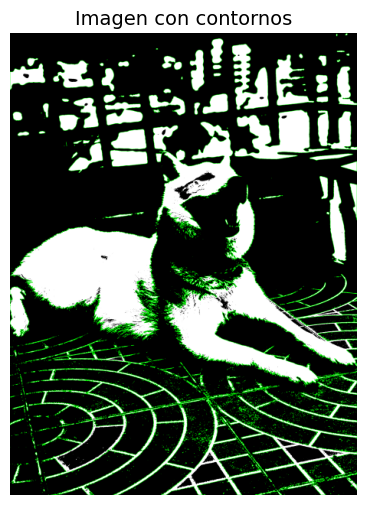

Se detectaron 7207 contornos.


In [52]:
# Detectar contornos
contornos, jerarquía = cv2.findContours(
    img_binaria,                  # Imagen binaria (fondo negro, objetos blancos)
    cv2.RETR_EXTERNAL,            # Solo contornos externos (puedes usar RETR_TREE para todos)
    cv2.CHAIN_APPROX_SIMPLE       # Método de compresión de contorno
)

# Dibujar contornos sobre una copia en color
img_contorno = cv2.cvtColor(img_binaria, cv2.COLOR_GRAY2BGR)  # Convertir a BGR para dibujar en color
cv2.drawContours(img_contorno, contornos, -1, (0, 255, 0), 2)  # Dibuja todos los contornos en verde

# Redimensionar para visualizar en Colab
escala = 0.15
dim = (int(img_contorno.shape[1] * escala), int(img_contorno.shape[0] * escala))
img_redimensionada = cv2.resize(img_contorno, dim, interpolation=cv2.INTER_AREA)

# Mostrar la imagen redimensionada con subtítulo usando matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img_redimensionada, cmap='gray')
plt.title('Imagen con contornos', fontsize=14)
plt.axis('off')  # Ocultar ejes
plt.show()

# Opcional: mostrar cuántos contornos se detectaron
print(f"Se detectaron {len(contornos)} contornos.")


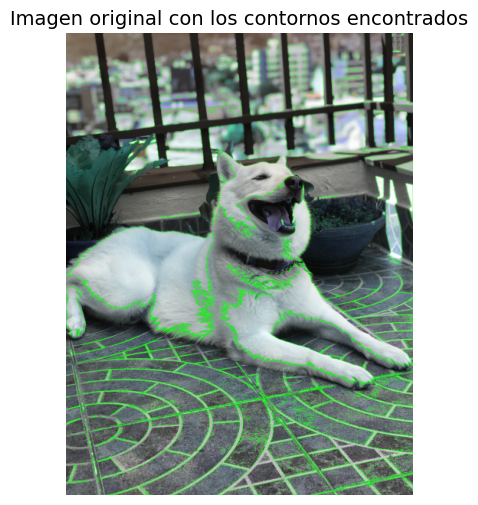

In [53]:
# Convertir imagen original PIL a NumPy
img_color_np = np.array(img_color)

# Si la imagen está en formato RGB (como es común con PIL), convertir a BGR para OpenCV
img_bgr = cv2.cvtColor(img_color_np, cv2.COLOR_RGB2BGR)

# Detectar contornos sobre la imagen binaria (umbral fijo o adaptativo)
contornos, jerarquía = cv2.findContours(
    img_binaria,                  # Imagen binaria (debe estar definida)
    cv2.RETR_EXTERNAL,
    cv2.CHAIN_APPROX_SIMPLE
)

# Dibujar contornos sobre la imagen original en color
cv2.drawContours(img_bgr, contornos, -1, (0, 255, 0), 2)  # Verde, grosor 2

# Redimensionar para mostrar en Colab
escala = 0.15
dim = (int(img_bgr.shape[1] * escala), int(img_bgr.shape[0] * escala))
img_redimensionada = cv2.resize(img_bgr, dim, interpolation=cv2.INTER_AREA)

# Mostrar la imagen redimensionada con subtítulo usando matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img_redimensionada, cmap='gray')
plt.title('Imagen original con los contornos encontrados', fontsize=14)
plt.axis('off')  # Ocultar ejes
plt.show()

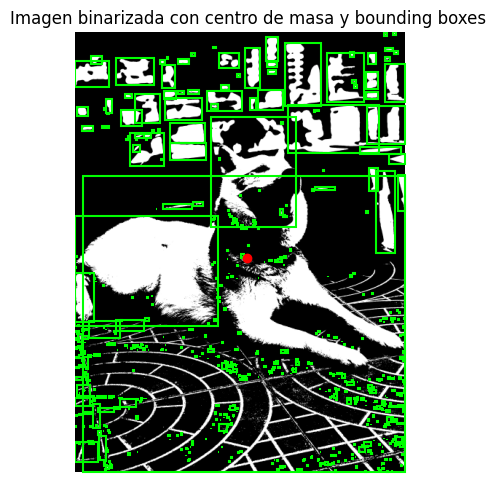

In [54]:
from scipy.ndimage import center_of_mass

# Convertir imagen a NumPy si es necesario
img_np = np.array(img_gray)

# Aplicar umbral fijo
umbral = 165
_, img_binaria = cv2.threshold(img_np, umbral, 255, cv2.THRESH_BINARY)

# Redimensionar imagen binaria
escala = 0.15
ancho = int(img_binaria.shape[1] * escala)
alto = int(img_binaria.shape[0] * escala)
dim = (ancho, alto)
img_redimensionada = cv2.resize(img_binaria, dim, interpolation=cv2.INTER_AREA)

# Detectar contornos
contornos, _ = cv2.findContours(img_redimensionada, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular centro de masa (usando imagen binaria como máscara booleana)
centro_masa = center_of_mass(img_redimensionada > 0)

# Mostrar todo en una misma gráfica
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(img_redimensionada, cmap='gray')
ax.set_title('Imagen binarizada con centro de masa y bounding boxes')
ax.axis('off')

# Dibujar centro de masa (círculo rojo)
ax.plot(centro_masa[1], centro_masa[0], 'ro', markersize=6)

# Dibujar bounding boxes
for contorno in contornos:
    x, y, w, h = cv2.boundingRect(contorno)
    rect = plt.Rectangle((x, y), w, h, edgecolor='lime', facecolor='none', linewidth=1.5)
    ax.add_patch(rect)

plt.show()